In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1 Data description

## Data Description.

column name in cleaned df | meaning 
--- | --- 
**customer** | Customer ID
**state** | US State 
**customer_lifetime_value** | CLV is the client economic value for a company during all their relationship
**response** | Response to marketing calls (customer engagement)
**coverage** | Customer coverage type
**education** | Customer education level
**effective_to_date** | Effective to date
**employmentstatus** | Customer employment status
**gender** | Customer gender
**income** | Customer income
**location_code** | Customer living zone
**marital_status:** | Customer marital status
**monthly_premium_auto:** | Monthly premium
**months_since_last_claim:** | Last customer claim
**months_since_policy_inception:** | Policy Inception
**number_of_open_complaints:** | Open claims
**number_of_policies:** | Number policies
**policy_type:** | Policy type
**policy:** | Policy
**renew_offer_type:** | Renew
**sales_channel:** | Sales channel (customer-company first contact)
**total_claim_amount:** | Claims amount
**vehicle_class:** | Vehicle class
**vehicle_size:** | Vehicle siz

**Goal: Can we predict the amount claimed by a customer in our data set?**

## 2 Fetch data

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is EA54-6392

 Directory of C:\Users\Krop\Documents\Ironhack\IronPau\week2\clase

18/04/2022  17:14    <DIR>          .
18/04/2022  17:14    <DIR>          ..
18/04/2022  12:28    <DIR>          .ipynb_checkpoints
18/04/2022  17:14         1,879,216 Cust_anal_LR.ipynb
18/04/2022  16:22         1,997,408 Cust_anal_LR_sian.ipynb
18/04/2022  16:20           869,925 flow_python_linreg.png
18/04/2022  09:06         1,581,918 marketing_customer_analysis.csv
               4 File(s)      6,328,467 bytes
               3 Dir(s)  772,650,291,200 bytes free


In [3]:
df = pd.read_csv('marketing_customer_analysis.csv')

In [4]:
df.head()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4            2/3/11         Employed      M   43836  ...   

  Months Since Policy Inception Number of Open Complaints  Number of Policies  \
0                             5                         0                   1   
1                            42                         0                   8   
2                            38                         0                   2   
3                            65                         0                   7   
4                            44                         0                   1   

      Policy Type        Policy  Renew Offer Type  Sales Channel  \
0  Corporate Auto  Corporate L3            Offer1          Agent   
1   Personal Auto   Personal L3            Offer3          Agent   
2   Personal Auto   Personal L3            Offer1          Agent   
3  Corporate Auto  Corporate L2            Offer1    Call Center   
4   Personal Auto   Personal L1            Offer1          Agent   

  Total Claim Amount  Vehicle Class Vehicle Size  
0         384.811147   Two-Door Car      Medsize  
1        1131.464935  Four-Door Car      Medsize  
2         566.472247   Two-Door Car      Medsize  
3         529.881344            SUV      Medsize  
4         138.130879  Four-Door Car      Medsize  

[5 rows x 24 columns]

In [5]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [6]:
#para ver todas las columnas vamos a cambiar una opcion de pandas
pd.set_option('display.max_columns', None)

## 3 cleaning and wrangling

In [7]:
df.shape

(9134, 24)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [9]:
#list comprehension para estandarizar headers

df.columns=[h.lower().replace(' ','_') for h in df.columns]

In [10]:
df.rename(columns={'employmentstatus':'employment_status'}, inplace=True, errors='raise')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employment_status              9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

## 4 Drop some columns

In [12]:
#after looking at the data description we decided to drop customer, sales channel (son irrelevante para predecir amount claimed)

df= df.drop(columns=['customer', 'sales_channel'])

## 5 exploration of data EDA

In [13]:
#mirar los unique value en cada columna

for c in df.columns:
    #print(df[c].unique())
    print(c, len(df[c].unique()))

state 5
customer_lifetime_value 8041
response 2
coverage 3
education 5
effective_to_date 59
employment_status 5
gender 2
income 5694
location_code 3
marital_status 3
monthly_premium_auto 202
months_since_last_claim 36
months_since_policy_inception 100
number_of_open_complaints 6
number_of_policies 9
policy_type 3
policy 9
renew_offer_type 4
total_claim_amount 5106
vehicle_class 6
vehicle_size 3


In [14]:
#miramos una columna por probar
df['marital_status'].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

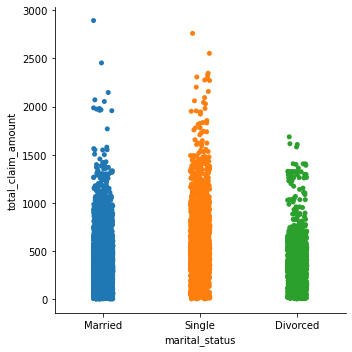

In [15]:
#empezamos con los plots

sns.catplot(x="marital_status", y="total_claim_amount", data=df)

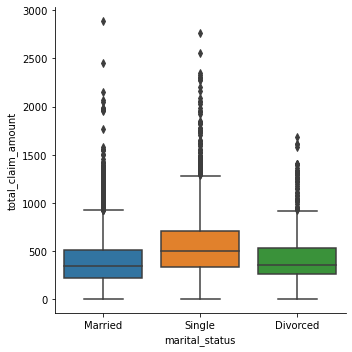

In [16]:
sns.catplot(x="marital_status", y="total_claim_amount",  kind='box', data=df)

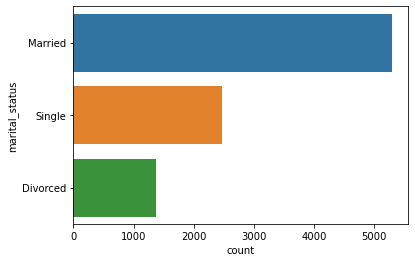

In [17]:
sns.countplot(y=df["marital_status"]);

<AxesSubplot:xlabel='total_claim_amount', ylabel='Count'>

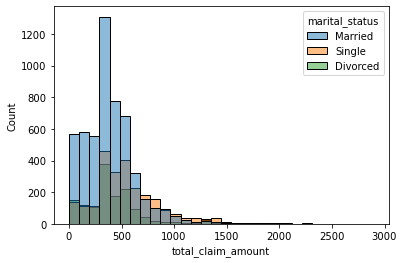

In [18]:
sns.histplot(x='total_claim_amount',hue='marital_status', bins=30, data=df)

In [19]:
df.describe()

customer_lifetime_value        income  monthly_premium_auto  \
count              9134.000000   9134.000000           9134.000000   
mean               8004.940475  37657.380009             93.219291   
std                6870.967608  30379.904734             34.407967   
min                1898.007675      0.000000             61.000000   
25%                3994.251794      0.000000             68.000000   
50%                5780.182197  33889.500000             83.000000   
75%                8962.167041  62320.000000            109.000000   
max               83325.381190  99981.000000            298.000000   

       months_since_last_claim  months_since_policy_inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000                      24.000000   
50%                  14.000000                      48.000000   
75%                  23.000000                      71.000000   
max                  35.000000                      99.000000   

       number_of_open_complaints  number_of_policies  total_claim_amount  
count                9134.000000         9134.000000         9134.000000  
mean                    0.384388            2.966170          434.088794  
std                     0.910384            2.390182          290.500092  
min                     0.000000            1.000000            0.099007  
25%                     0.000000            1.000000          272.258244  
50%                     0.000000            2.000000          383.945434  
75%                     0.000000            4.000000          547.514839  
max                     5.000000            9.000000         2893.239678

In [20]:
#vamos a agrupar? y sacar la mediana?

summary = df.groupby('marital_status')['total_claim_amount'].mean()

In [21]:
summary

marital_status
Divorced    403.704718
Married     384.517033
Single      557.407396
Name: total_claim_amount, dtype: float64

<AxesSubplot:xlabel='number_of_open_complaints', ylabel='total_claim_amount'>

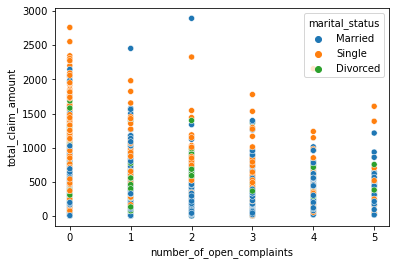

In [22]:
#ahora miramos el n de complaint

sns.scatterplot(x="number_of_open_complaints", y='total_claim_amount', hue='marital_status', data=df)

## 6 create subsets of columns -categ and num

In [23]:
#geting df for numeric and categoricals

dfn=df.select_dtypes(exclude=object)

dfcat=df.select_dtypes(include=object)

In [24]:
dfn.shape

(9134, 8)

In [25]:
dfcat.shape

(9134, 14)

In [26]:
#esto no sirve de na
#sns.displot(dfn)

## 7 visualization

In [27]:
#primero para mostrar un mjeor tamaño de cosas que saquemos por seaborn seteamos el figsize
#plt.figure(figsize=(20,8))

sns.set(rc={'figure.figsize':(20,20)})

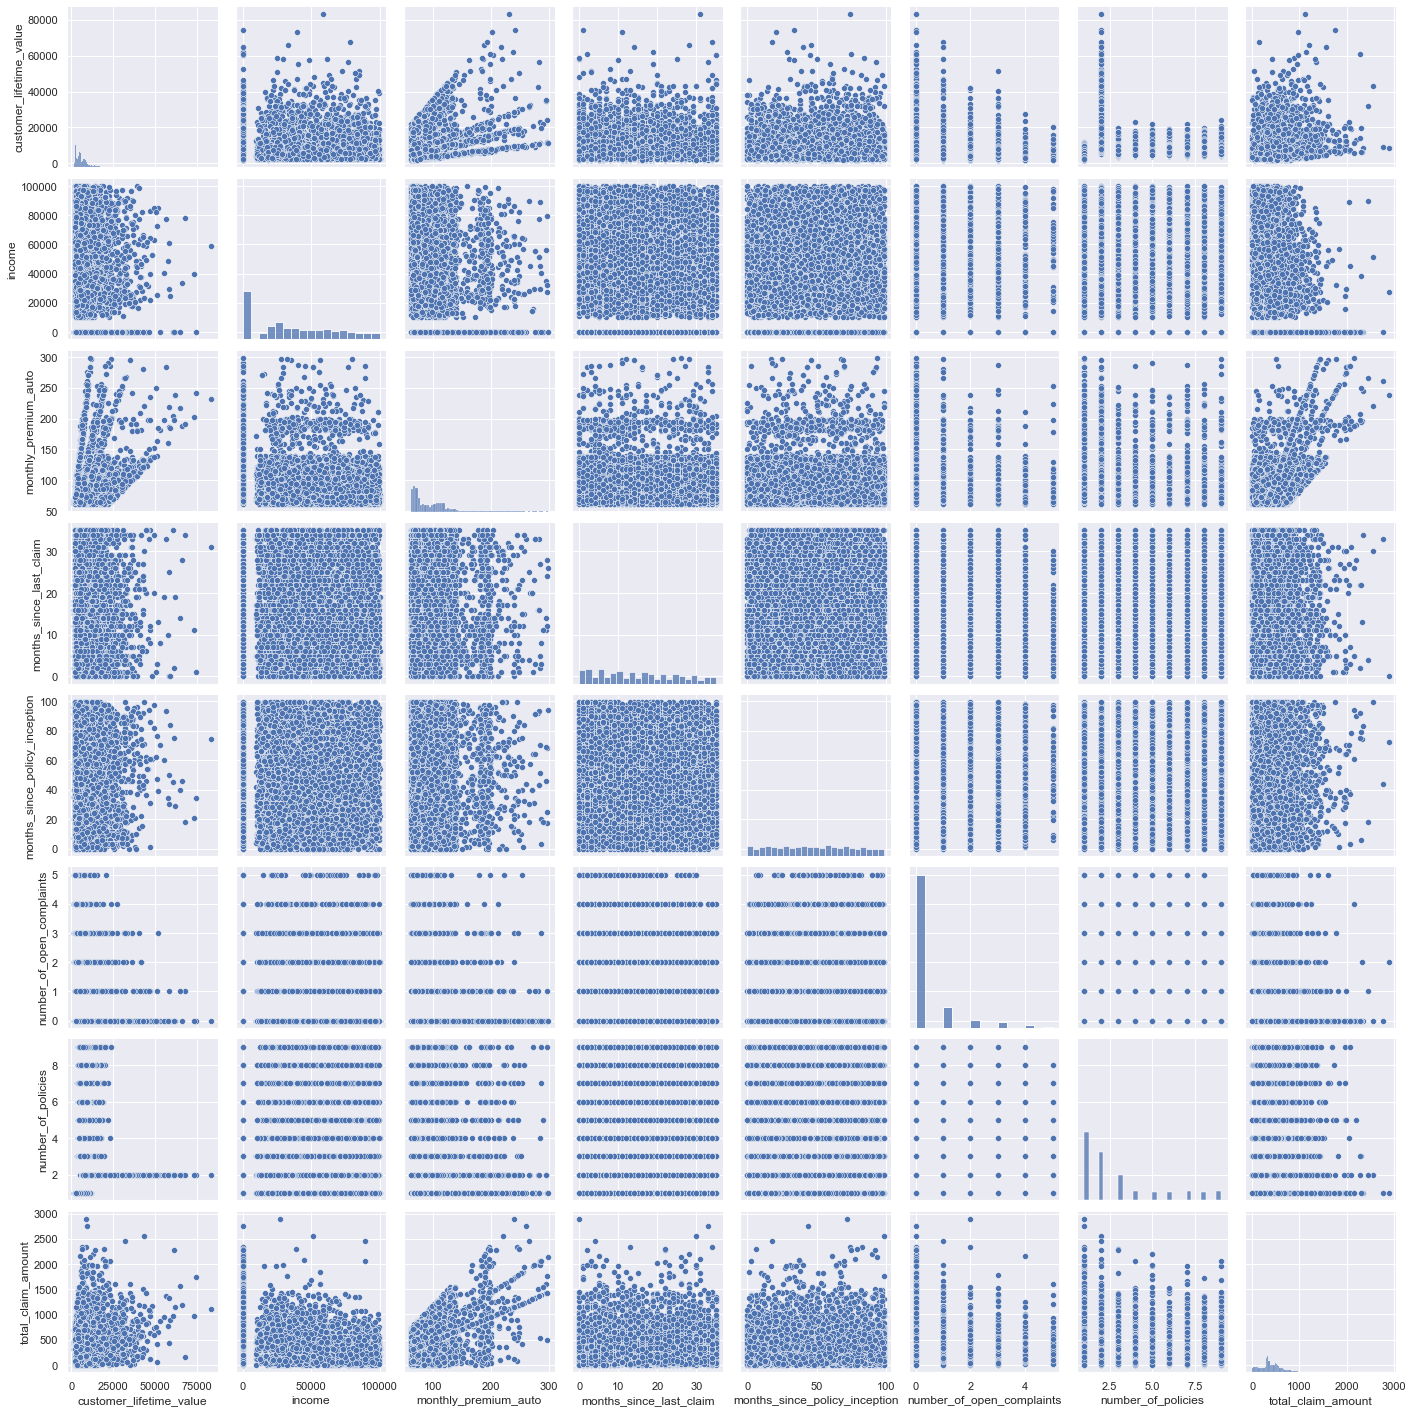

In [28]:
#lo primero el pairplot que nos muestra ya un pococ por donde pueden ir las cosas
sns.pairplot(dfn)

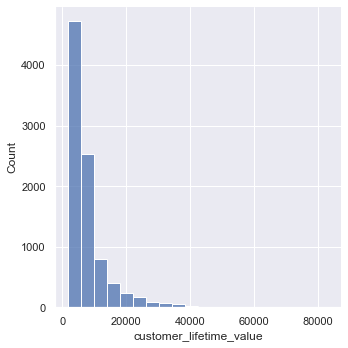

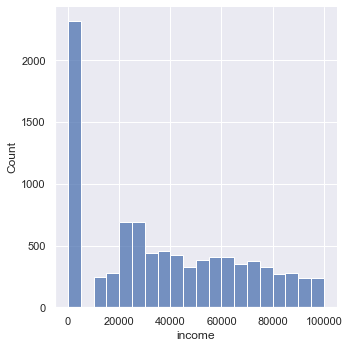

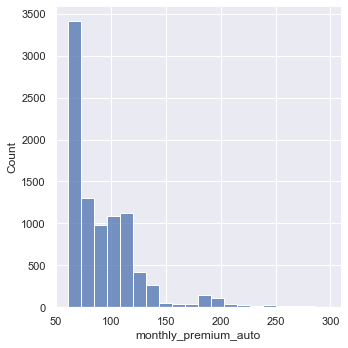

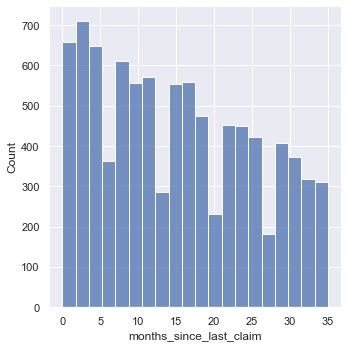

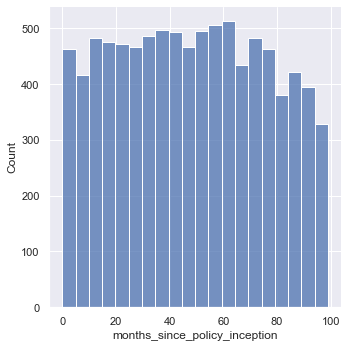

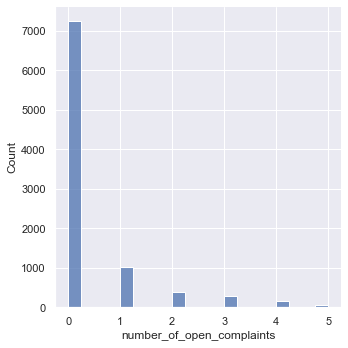

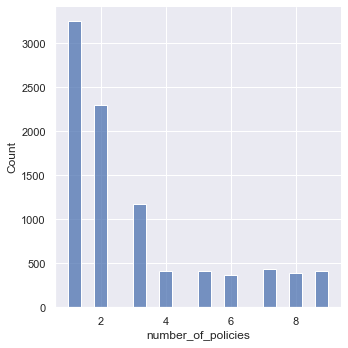

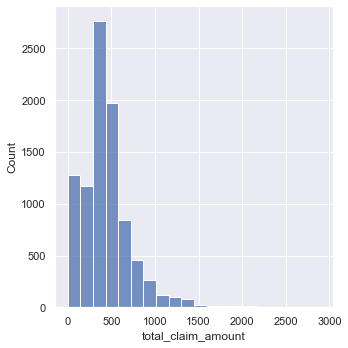

In [29]:
for col in dfn.columns:
    sns.displot(dfn[col], bins=20)
    plt.show()

<AxesSubplot:>

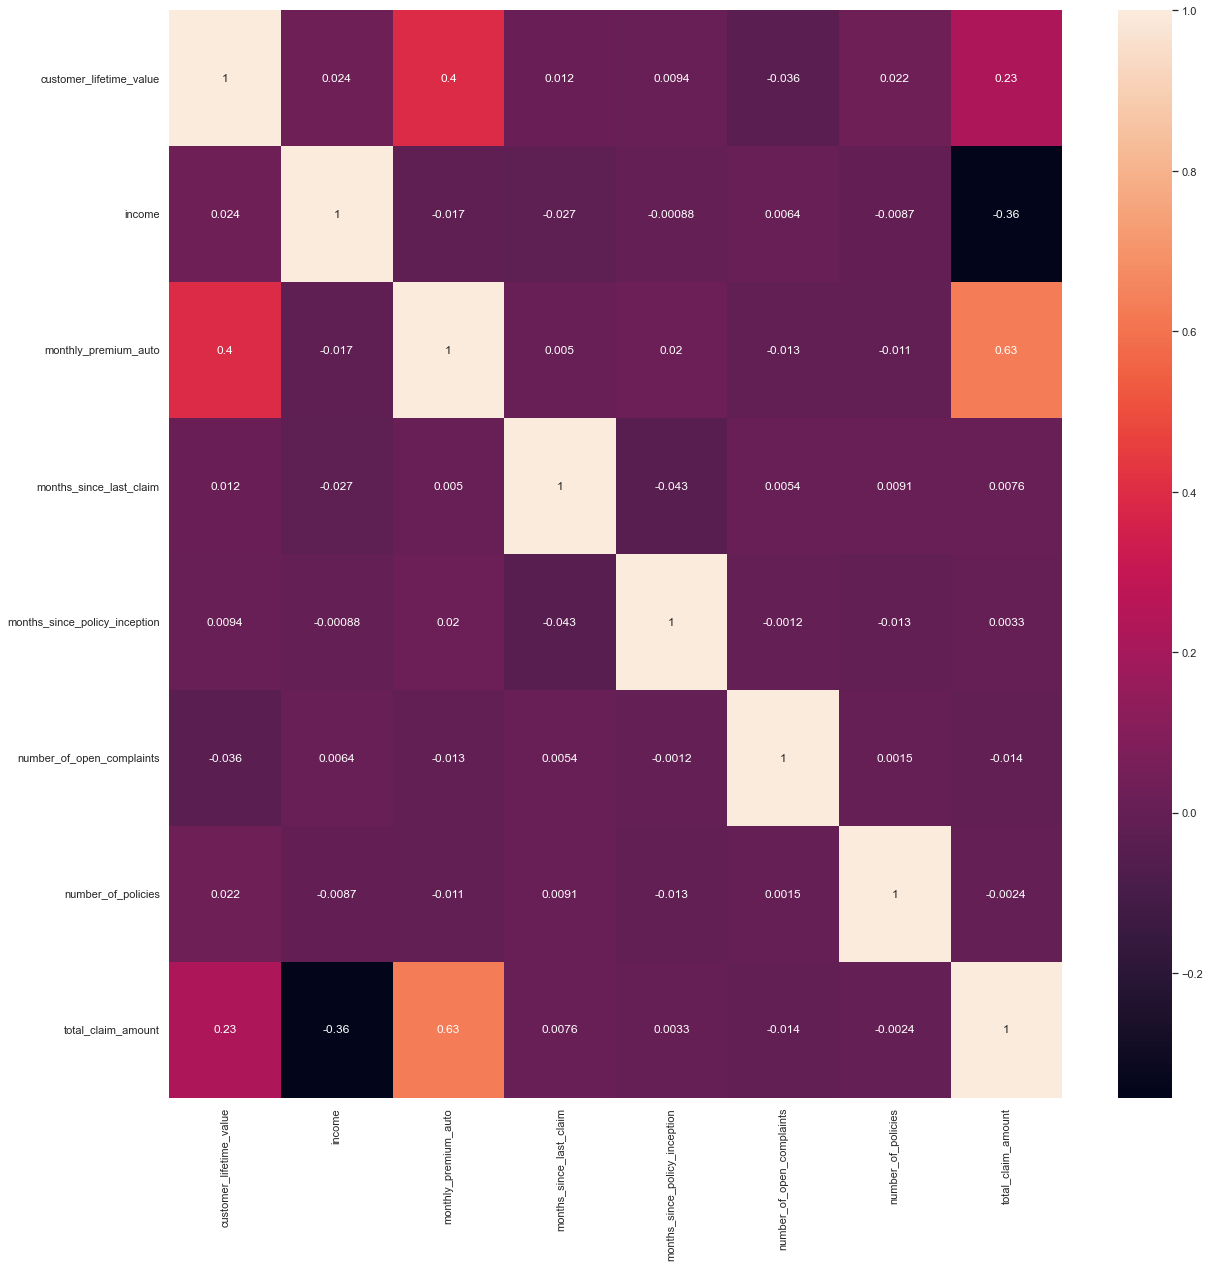

In [30]:
#correlation matrix

sns.heatmap(df.corr(), annot = True)

<AxesSubplot:>

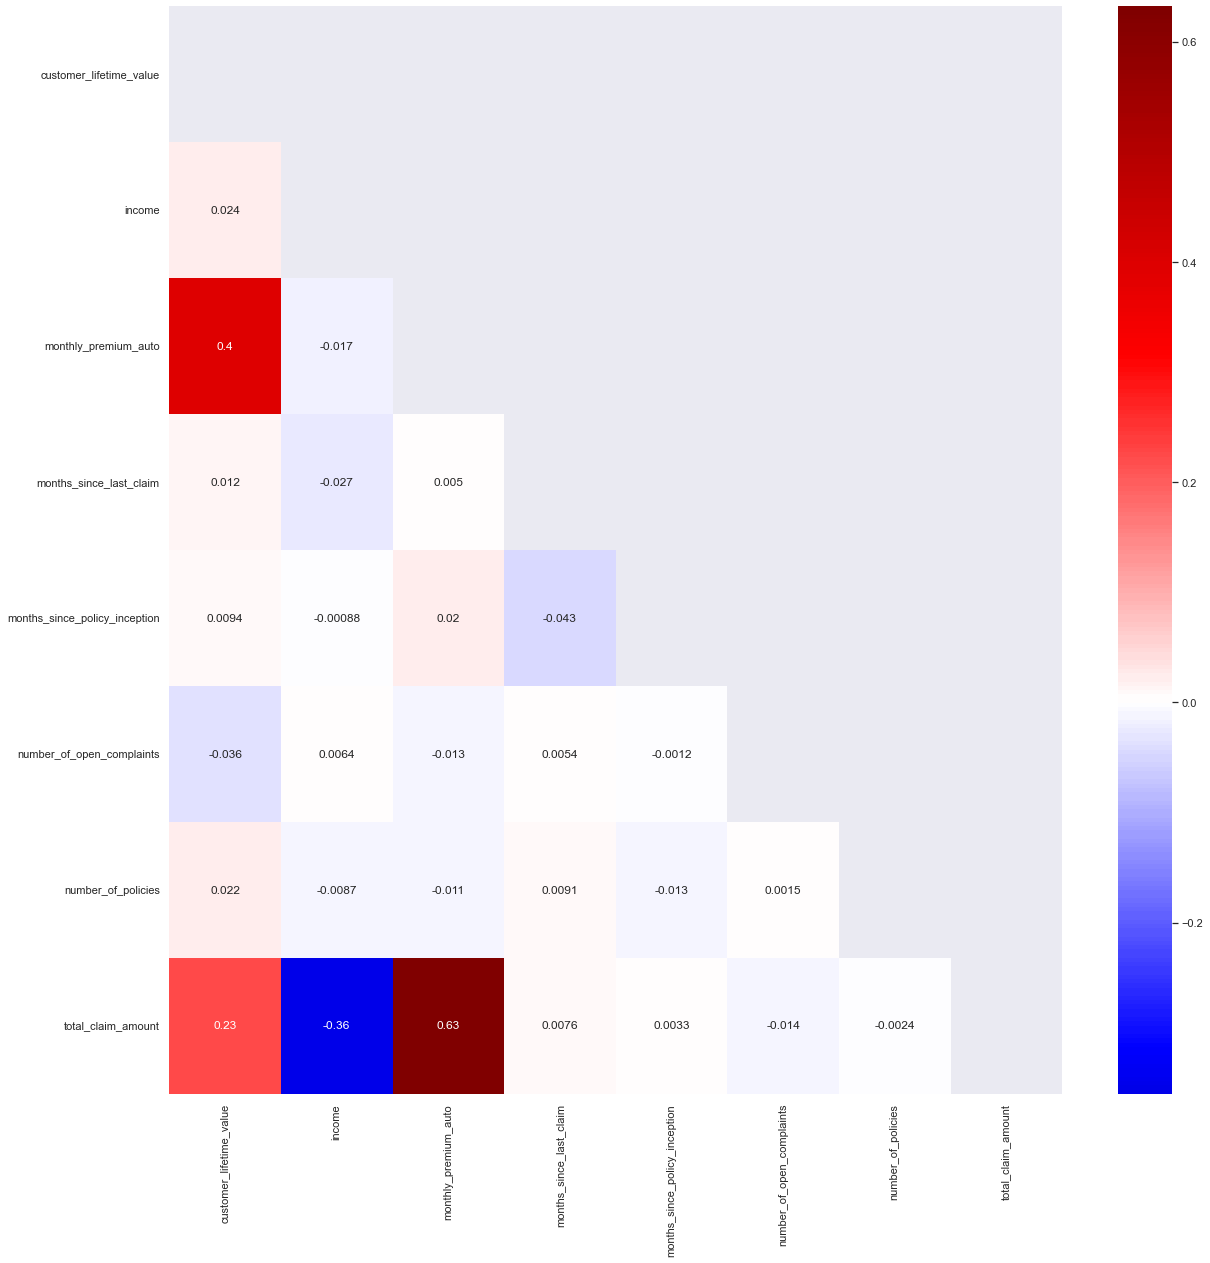

In [31]:
#una forma mucho mejor de ver las posibles correlaciones es 'procesando' un poco mas el aspecto del heatmap

mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)]=True
sns.heatmap(df.corr(), annot = True, mask=mask, cmap='seismic', center=0)

#fijemosnos que customerlifetimevalue income y monthly premium auto tienen algun tipo de correlacion relevante

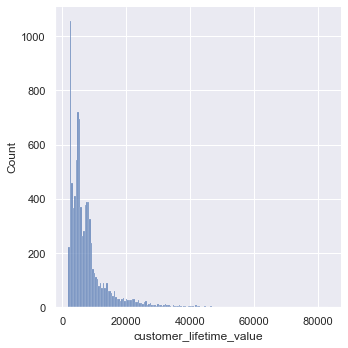

In [32]:
#ahora miremos de tratar el customer_lifetime_value
sns.displot(df['customer_lifetime_value'])

<AxesSubplot:xlabel='customer_lifetime_value'>

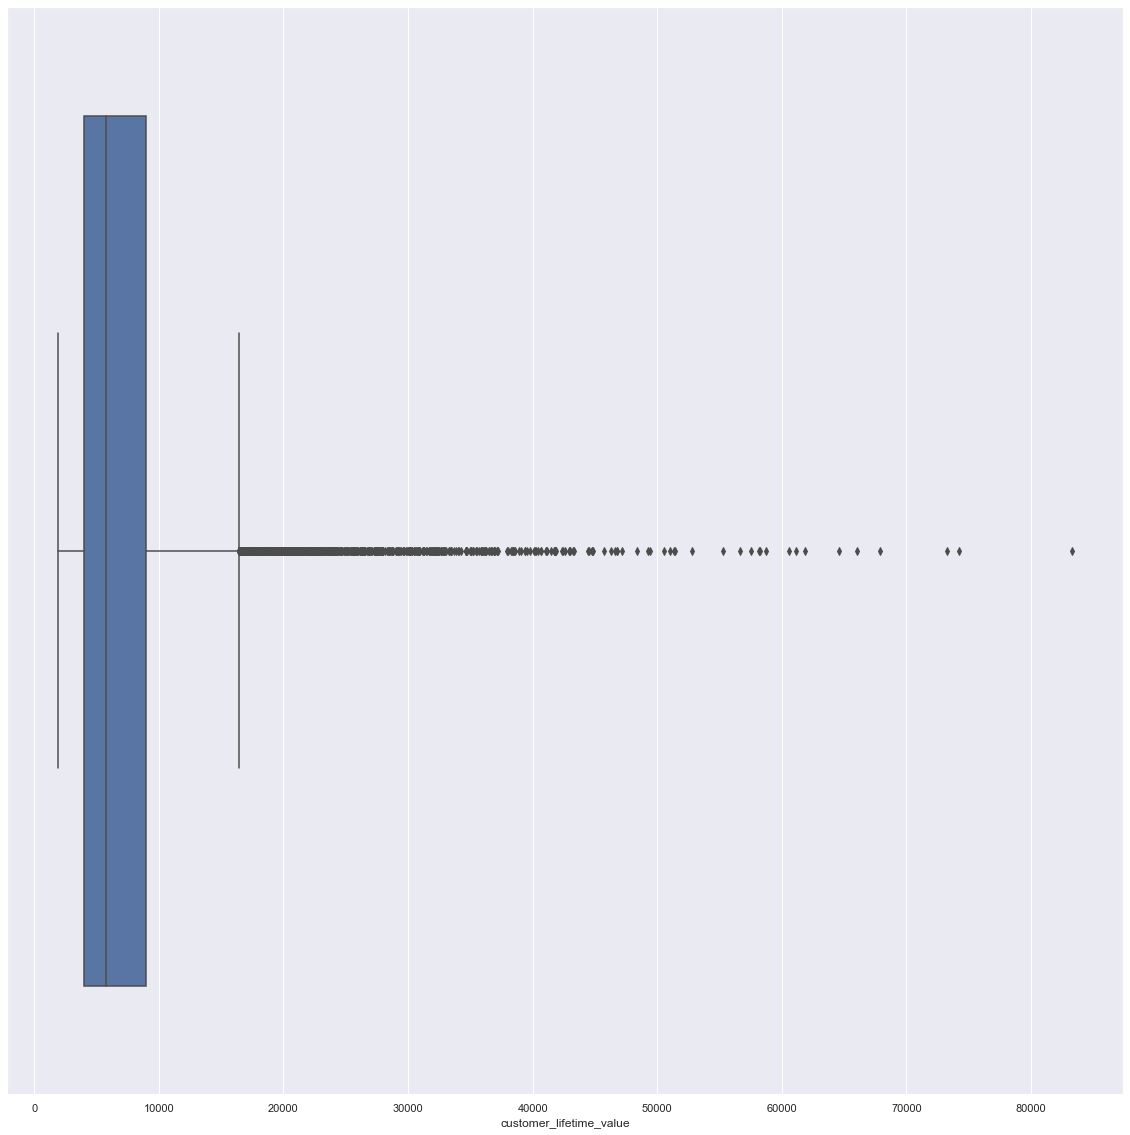

In [33]:
sns.boxplot(x=df['customer_lifetime_value'])

# identificando outliers
- find the percentile 25 and 75
- calculate the IQR (dif betwen 25 and 75)
- limits - any rows under or over the 25 or 75 = outliers
- could also set your own limits

In [34]:
q1 = np.percentile(df['customer_lifetime_value'], 25)
q1

3994.25179425

In [35]:
q3 = np.percentile(df['customer_lifetime_value'], 75)
q3

8962.16704125

In [36]:
iqr = q3-q1
iqr

4967.915247000001

In [37]:
#ahora sacamos los limites de datos 'normales' --- upper_boundary -- lower_boundary

upperb = q3+(1.5*iqr)
lowerb = q1-(1.5*iqr)

In [38]:
# mirem els valors que estan per sota del lowerb

len(df[df['customer_lifetime_value']<lowerb])

0

In [39]:
#mirem valors que estan per sobre del upper b

len(df[df['customer_lifetime_value']>upperb])

817

### 7.2 power transformation

log transform - np.log() - cannot log transform a null --> error!
- make a copy of column
- create a log transform function
- apply to the column
- visualise the distribution afterwards

In [41]:
#definim una funcio per transformar a log de manera senzilla
def log_transform(x):
    x=np.log(x)
    if np.isfinite(x):
        return x
    else:
        return 0


In [42]:
#create a copy of column in isolation
#we use the python method map that is quite useful
# map(arg1 = process, arg2= object)

clv_1 = list(map(log_transform, df['customer_lifetime_value']))

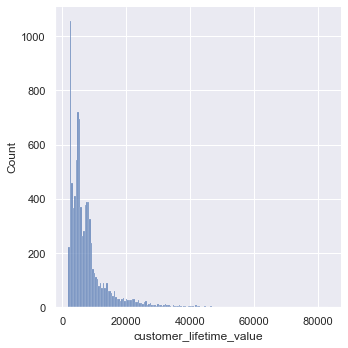

In [43]:
#now we compare the plots with linear axis
sns.displot(df['customer_lifetime_value'])

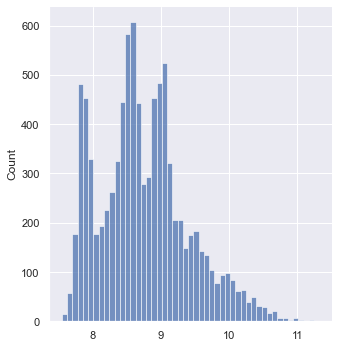

In [44]:
#and the plot with log axis
sns.displot(clv_1)

In [45]:
#ejemplo anything over 5k is an outlier

len(df[df['customer_lifetime_value']>5000])

5668

# 7.3 scaling

In [46]:
from sklearn.preprocessing import MinMaxScaler as mms

In [47]:
#custom lifetime value

df['customer_lifetime_value']=mms().fit_transform(df['customer_lifetime_value'].values.reshape(-1, 1))

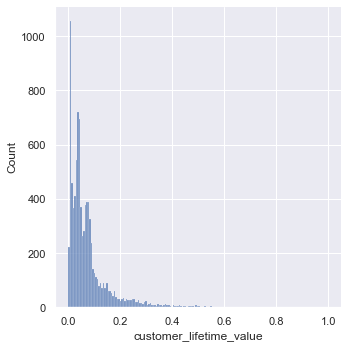

In [48]:
sns.displot(df['customer_lifetime_value'])

#no funsiono mu bien :-/

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          9134 non-null   object 
 1   customer_lifetime_value        9134 non-null   float64
 2   response                       9134 non-null   object 
 3   coverage                       9134 non-null   object 
 4   education                      9134 non-null   object 
 5   effective_to_date              9134 non-null   object 
 6   employment_status              9134 non-null   object 
 7   gender                         9134 non-null   object 
 8   income                         9134 non-null   int64  
 9   location_code                  9134 non-null   object 
 10  marital_status                 9134 non-null   object 
 11  monthly_premium_auto           9134 non-null   int64  
 12  months_since_last_claim        9134 non-null   i

In [50]:
#convertimos la columna effective_to_date en date
df['effective_to_date']=pd.to_datetime(df['effective_to_date']).dt.date

In [51]:
#aqui tenemos problemas con el tema del date que no es numerico y hacer el boxplot
#sns.boxplot(x=df['effective_to_date'])

In [52]:
dfn.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [53]:
#aplicar slcaer para all num columns excepto target
#asi tenemos toda la tabla transformada

for c in dfn.columns[:-1]:
    dfn[c]=mms().fit_transform(dfn[c].values.reshape(-1,1))

In [54]:
dfn.head()

customer_lifetime_value    income  monthly_premium_auto  \
0                 0.010629  0.562847              0.033755   
1                 0.062406  0.000000              0.139241   
2                 0.134960  0.487763              0.198312   
3                 0.070589  0.000000              0.189873   
4                 0.011245  0.438443              0.050633   

   months_since_last_claim  months_since_policy_inception  \
0                 0.914286                       0.050505   
1                 0.371429                       0.424242   
2                 0.514286                       0.383838   
3                 0.514286                       0.656566   
4                 0.342857                       0.444444   

   number_of_open_complaints  number_of_policies  total_claim_amount  
0                        0.0               0.000          384.811147  
1                        0.0               0.875         1131.464935  
2                        0.0               0.125          566.472247  
3                        0.0               0.750          529.881344  
4                        0.0               0.000          138.130879

## 8 Categories

In [55]:
dfcat

state response  coverage education effective_to_date  \
0     Washington       No     Basic  Bachelor           2/24/11   
1        Arizona       No  Extended  Bachelor           1/31/11   
2         Nevada       No   Premium  Bachelor           2/19/11   
3     California       No     Basic  Bachelor           1/20/11   
4     Washington       No     Basic  Bachelor            2/3/11   
...          ...      ...       ...       ...               ...   
9129  California       No     Basic  Bachelor           2/10/11   
9130  California      Yes  Extended   College           2/12/11   
9131  California       No  Extended  Bachelor            2/6/11   
9132  California       No  Extended   College            2/3/11   
9133  California       No  Extended   College           2/14/11   

     employment_status gender location_code marital_status     policy_type  \
0             Employed      F      Suburban        Married  Corporate Auto   
1           Unemployed      F      Suburban         Single   Personal Auto   
2             Employed      F      Suburban        Married   Personal Auto   
3           Unemployed      M      Suburban        Married  Corporate Auto   
4             Employed      M         Rural         Single   Personal Auto   
...                ...    ...           ...            ...             ...   
9129          Employed      M         Urban        Married   Personal Auto   
9130          Employed      F      Suburban       Divorced  Corporate Auto   
9131        Unemployed      M      Suburban         Single  Corporate Auto   
9132          Employed      M      Suburban        Married   Personal Auto   
9133        Unemployed      M      Suburban         Single  Corporate Auto   

            policy renew_offer_type  vehicle_class vehicle_size  
0     Corporate L3           Offer1   Two-Door Car      Medsize  
1      Personal L3           Offer3  Four-Door Car      Medsize  
2      Personal L3           Offer1   Two-Door Car      Medsize  
3     Corporate L2           Offer1            SUV      Medsize  
4      Personal L1           Offer1  Four-Door Car      Medsize  
...            ...              ...            ...          ...  
9129   Personal L1           Offer2  Four-Door Car      Medsize  
9130  Corporate L3           Offer1  Four-Door Car      Medsize  
9131  Corporate L2           Offer1  Four-Door Car      Medsize  
9132   Personal L2           Offer3  Four-Door Car        Large  
9133  Corporate L3           Offer4   Two-Door Car      Medsize  

[9134 rows x 14 columns]

In [56]:
# drop effective to date

dfcat=dfcat.drop(columns=['effective_to_date'])
dfcat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   state              9134 non-null   object
 1   response           9134 non-null   object
 2   coverage           9134 non-null   object
 3   education          9134 non-null   object
 4   employment_status  9134 non-null   object
 5   gender             9134 non-null   object
 6   location_code      9134 non-null   object
 7   marital_status     9134 non-null   object
 8   policy_type        9134 non-null   object
 9   policy             9134 non-null   object
 10  renew_offer_type   9134 non-null   object
 11  vehicle_class      9134 non-null   object
 12  vehicle_size       9134 non-null   object
dtypes: object(13)
memory usage: 927.8+ KB


 OHE . one hot encoder

-OR-

pd get_dummies



In [57]:
#sacamos una nueva tabla que haga hecho los dummies
dfcat_enc=pd.get_dummies(dfcat)

In [58]:
dfcat_enc

state_Arizona  state_California  state_Nevada  state_Oregon  \
0                 0                 0             0             0   
1                 1                 0             0             0   
2                 0                 0             1             0   
3                 0                 1             0             0   
4                 0                 0             0             0   
...             ...               ...           ...           ...   
9129              0                 1             0             0   
9130              0                 1             0             0   
9131              0                 1             0             0   
9132              0                 1             0             0   
9133              0                 1             0             0   

      state_Washington  response_No  response_Yes  coverage_Basic  \
0                    1            1             0               1   
1                    0            1             0               0   
2                    0            1             0               0   
3                    0            1             0               1   
4                    1            1             0               1   
...                ...          ...           ...             ...   
9129                 0            1             0               1   
9130                 0            0             1               0   
9131                 0            1             0               0   
9132                 0            1             0               0   
9133                 0            1             0               0   

      coverage_Extended  coverage_Premium  education_Bachelor  \
0                     0                 0                   1   
1                     1                 0                   1   
2                     0                 1                   1   
3                     0                 0                   1   
4                     0                 0                   1   
...                 ...               ...                 ...   
9129                  0                 0                   1   
9130                  1                 0                   0   
9131                  1                 0                   1   
9132                  1                 0                   0   
9133                  1                 0                   0   

      education_College  education_Doctor  education_High School or Below  \
0                     0                 0                               0   
1                     0                 0                               0   
2                     0                 0                               0   
3                     0                 0                               0   
4                     0                 0                               0   
...                 ...               ...                             ...   
9129                  0                 0                               0   
9130                  1                 0                               0   
9131                  0                 0                               0   
9132                  1                 0                               0   
9133                  1                 0                               0   

      education_Master  employment_status_Disabled  \
0                    0                           0   
1                    0                           0   
2                    0                           0   
3                    0                           0   
4                    0                           0   
...                ...                         ...   
9129                 0                           0   
9130                 0                           0   
9131                 0                           0   
9132                 0                           0   
9133                 0                          

In [59]:
dfcat_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 53 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   state_Arizona                    9134 non-null   uint8
 1   state_California                 9134 non-null   uint8
 2   state_Nevada                     9134 non-null   uint8
 3   state_Oregon                     9134 non-null   uint8
 4   state_Washington                 9134 non-null   uint8
 5   response_No                      9134 non-null   uint8
 6   response_Yes                     9134 non-null   uint8
 7   coverage_Basic                   9134 non-null   uint8
 8   coverage_Extended                9134 non-null   uint8
 9   coverage_Premium                 9134 non-null   uint8
 10  education_Bachelor               9134 non-null   uint8
 11  education_College                9134 non-null   uint8
 12  education_Doctor                 9134 non-null  

## 9 Bring the data frame back together

In [60]:
#check the shape

print(dfn.shape)
print('numbers')
print(dfcat_enc.shape)
print('categorie')


(9134, 8)
numbers
(9134, 53)
categorie


In [61]:
df_full=pd.concat([dfn,dfcat_enc], axis=1)

## 10 define X and Y

In [62]:
x = df_full.drop(columns=['total_claim_amount'])
y = df_full['total_claim_amount']

## 11 import and apply model

- go to sklearn and select correct model
- define any hyper parameter
- split the data into train and test
- train the model on the training data
- test the model on the test data
- evaluate the model


In [63]:
from sklearn.linear_model import LinearRegression as Lin

In [64]:
from sklearn.model_selection import train_test_split as tts

In [65]:
#define the model
#le damos nombre al modelo creo??

linreg = Lin()


In [66]:
#split the data into TT

X_train, X_test, y_train, y_test = tts(x, y, test_size=0.3, random_state=40)

In [67]:
# train the model on train

linreg.fit(X_train, y_train)


LinearRegression()

In [68]:
#make some predictions on test
# aqui usamos la regresionlineal.predict [que seria nuestro modelo] para ver que valores nos daria si le pasamos
#le pasamos unos valores x_test y como resultado sale y_prediccion (que miramos a continuacion)

y_pred = linreg.predict(X_test)

In [69]:
#aqui mostrem els valors que ens hem "guardat" com a TEST per comparar amb resultats

y_test.head(10)

554     451.200000
1825    355.200000
218     537.600000
7261    274.114843
3858    302.400000
5600    556.800000
7570    331.200000
8767    502.873215
4409    336.000000
7145    321.600000
Name: total_claim_amount, dtype: float64

In [70]:
#aqui hacemos un dataframes de y prediccion?? aixo es la PREDICT

y_pred_df=pd.DataFrame(y_pred)

In [71]:
#aqui mostrem valors que ens ha tret la PREDICT (y ho podem comparar amb els valors de TEST)

y_pred_df.head(10)

0
0  571.0
1  414.0
2  632.0
3  169.0
4  325.0
5  615.0
6  457.0
7  542.0
8  538.0
9  404.0

In [72]:
#hacemos describe de las y que nos predice el modelo
y_pred_df.describe()

0
count  2741.000000
mean    434.077709
std     255.595038
min     -68.000000
25%     266.000000
50%     436.000000
75%     572.000000
max    1576.000000

In [73]:
#hacemos un dataframe del TEST
y_test_df=pd.DataFrame(y_test)
y_test_df

total_claim_amount
554           451.200000
1825          355.200000
218           537.600000
7261          274.114843
3858          302.400000
...                  ...
6800          392.235698
283           412.101933
5339          688.547375
7926          312.000000
3881            1.587888

[2741 rows x 1 columns]

In [74]:
# y mostramos datos estadisticos de TEST que si miramos se parecen bastante al PREDICT
y_test_df.describe()

total_claim_amount
count         2741.000000
mean           435.773981
std            294.957574
min              0.099007
25%            273.945412
50%            379.281455
75%            552.000000
max           2552.343856

## 12 compare and evaluate

In [75]:
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [76]:
#la "fiabilidad" o porcentaje de acierto ?
r2(y_test, y_pred)

0.7718511267770748

In [77]:
#error al cuadrado -- es la mejor accuracy indicator? que puedes sacar?
mse(y_test, y_pred)

19841.70373145805

In [78]:
#error absoluto en este caso dolares que te equivocas por encima o por debajo
mae(y_test, y_pred)

95.6573936023349